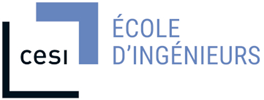
# <center> Projet escape no game <br>
   

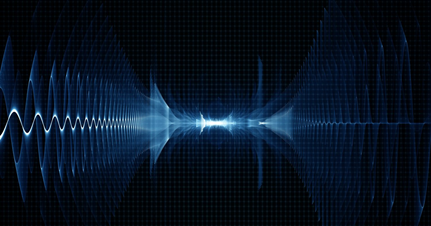

<h1 style='text-align: center; color: black; background: #5C87DA; padding:10px;  margin-right: 50px;'>Livrable 4</h1>

18/12/2020

Groupe 8 : Yan, Victor, Gael et Pierre-Yves

# Table des matières 

### 1. Contexte 
	
### 2. Problématiques  
	
### 3. Contenu du livrable

### 4. Plan d'action
	
### 5. Réalisation du plan d’action 

### 6. Conclusion   

### 7. Références bibliographiques 

<h1 style='text-align: center; color: black; background: #5C87DA; padding:10px;  margin-right: 50px;'>1. Contexte</h1>

Un agent ayant infiltré une base de hackeurs se retrouve bloqué dans une salle d'audioconférence, d'où la communication par onde avec l'extérieur est impossible. Il doit transmettre les données de son pad spécial espion vers l'extérieur et n'a accès qu'à un micro et au matériel de la salle ; sachant que la salle est connectée au réseau uniquement lorsqu'elle est en utilisation.

Il doit transmettre les données de son pad spécial espion vers l'extérieur. Le seul accessoire disponible dans la salle était un micro branché au système d'audioconférence uniquement connecté au réseau lors de l'utilisation de la salle.

Maintenant que nous avons une compréhension complète de la chaîne de transmission pour réaliser la communication, nous devons construire un prototype pour prouver la faisabilité de votre solution.

<h1 style='text-align: center; color: black; background: #5C87DA; padding:10px;  margin-right: 50px;'>2. Problématiques</h1>


Comment effectuer toutes les étapes de la transformation des messages pour envoyer des messages ?

Comment reconstruire toute la chaîne de transmission sur n'importe quelle entrée de type texte (5 à 10 caractères)?

Comment intégrer un système de détection d'erreurs ?

Comment générer une sortie à chaque étape pour visualiser et vérifier le bon déroulement de l'étape de code ?

<h1 style='text-align: center; color: black; background: #5C87DA; padding:10px;  margin-right: 50px;'>3. Contenu du livrable</h1>


Une page Jupyter qui intègre toutes les opérations de signal en Python pour simuler la communication et démontrer la faisabilité de la solution.

Le code sera expliqué.

<h1 style='text-align: center; color: black; background: #5C87DA; padding:10px;  margin-right: 50px;'>4. Plan d'action</h1>

Votre POC permettra d'effectuer toutes les étapes de conversion de message. La phase de lancement se terminera par la lecture du son généré (le son créé par le pad de l’agent). Dans un second temps, votre POC simulera la réception du signal. Cette étape contiendra toutes les étapes de conversion pour reconstruire le message d'origine.

Pour être accepté, votre POC doit parfaitement reconstituer l'ensemble de la chaîne de transmission sur toute entrée de type texte (5 à 10 caractères). Dans cette version de base, le mode de communication sera le mode simplex. Il n'y aura pas de bruit lors de la réception du signal. Le message sera décomposé en plusieurs trames, et votre prototype intégrera un système de détection d'erreur.

Ces étapes seront clairement identifiées dans un code séparé au niveau du cahier, avec tous les commentaires nécessaires. Votre code générera une sortie à chaque étape, vous permettant de visualiser et de vérifier le bon fonctionnement de cette étape. (Niveau disponible B)

Pour vraiment impressionner le comité de pilotage (livrables de niveau A), vous devez d'abord implémenter le système CRC. Vous devez également intégrer les 2 autres fonctions suivantes:

   - l'envoi et la reconstitution d'un message de type son

   - la gestion de la réception d'un signal avec bruit

   - l'utilisation d'une liaison half duplex (accusé de réception)

   - un code de correction d'erreur

   - la simulation entre 2 PC (l'un pour la génération du son correspondant au message à envoyer, l'autre pour la réception et la reconstruction du message)

   - la mise en œuvre d'un second type de modulation/démodulation

<h1 style='text-align: center; color: black; background: #5C87DA; padding:10px;  margin-right: 50px;'>5. Réalisation du plan d'action</h1>

Nous devons tout d'abord implémenter un système de CRC. Nous devons également intégrer 2 fonctionnalités supplémentaires :

   * un code de correction d'erreur

   * la mise en œuvre d'un second type de modulation/démodulation

#### Initialisation

Le programme commence par initialiser les modules dont il a besoin ainsi que les fonctions auquelles il va faire appel

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf

def Decim2bin(Dec):
    #Conversion décimal binaire 

    nombre = int(Dec)
    resultat = ''
    while nombre!=0:
        q=nombre//2
        r=nombre%2
        resultat += str(r)
        nombre=q
 
    res = ''
    for i in range(len(resultat)-1, -1, -1):
        res += resultat[i]
    
    while len(res)<7:
        res='0'+res
    return res[::-1]

def CodageHamming(c):
    #ajout des bits de parité
    b=[Decim2bin(i) for i in range(2**7)]
    b=[list(i) for i in b]                   #génération d'une liste en binaire
    b=np.matrix(b)
    H=0
    while 2**(H)<=len(c):
                         #calcule du nombre de bit de parité
        H= H+1
    if 2**(H)<=len(c)+H:
        H=H+1
        
    for i in [2**ii for ii in range(H)]:
                                       #ajout des bits de parité "vide"
        c.insert(i-1,0)
        
    for i in range(H):
                       #calcul de la parité de chaque bit
        parite=0
        for rang in range(1,len(c)+1):
            if b[rang,i]=="1":
                parite= parite+c[rang-1]
        c[2**i-1]=parite%2
    return(c)

def DecodageHamming(c):
                      #détection et correction d'erreur et retrait des bits de parité
    
    b=[Decim2bin(i) for i in range(2**7)]
    b=[list(i) for i in b]                   #génération d'une liste en binaire
    b=np.matrix(b)
    
    H=0

    while 2**(H)<=len(c):
                         #calcul du nombre de bits de parité
        H= H+1
    
    bitsHamming=[0 for i in range(H)]    #création d'une liste contenant les erreurs de parité
    
    for i in range(H):
                      #calcul des erreurs de parité
        parite=0
        for rang in range(1,len(c)+1):
            if b[rang,i]=="1":
                parite= parite+c[rang-1]
        if parite%2==1:
            bitsHamming[i]=1
    
    erreur=0
    for i,j in enumerate(bitsHamming):
                                      #calcul de la position de l'erreur
        if j==1:
            erreur=erreur+2**i
    if erreur!=0:
                  #correction de l'erreur détecté
        print("ERREUR",erreur)
        c[erreur-1]=(c[erreur-1]+1)%2


    rangHamming=[2**ii for ii in range(H)]
    rangHamming=rangHamming[::-1]            #retrait des bits de parités
    for i in rangHamming:
        c.pop(i-1)
    return(c)

Pour le codage de Hamming le programme va commencer par générer un liste de nombre binaire, ils serviront plus tard. Il va ensuite compter le nombre de bit de sécurité H necessaire puis ajouter des 0 à la position de chaque bit de parité. Finalement il va calculer la parité de chaque bit sachant que le bit de parité numéro n calcul la parité de tous les bits s'écrivant avec un 1 au n-ième en binaire, le programme s'aide de la liste créé précedemment pour cela.



Le decodage suis les mêmes première étapes que le codage, à savoir la création d'une liste de bit et le calcul du nombre de bit de sécurité. Il va ensuite calculer les parités de chaque bit de parité et les mettre dans une liste. Il transformera ensuite cette liste en nombre binaire puis décimale qui indique la position de l'erreur, 0 étant une absence d'erreur.

#### LE CRC 
Le CRC (ou méthode des codes polynômiaux) est la méthode la plus utilisée pour détecter des erreurs groupées. Avant la transmission, on ajoute des bits de contrôle. Si des erreurs sont détectées à la réception, il faut retransmettre le message.

Une information de n bits peut être considérée comme la liste des coefficients binaires d'un polynôme de n termes, donc de degré n-1. 

Soit M le message correspondant aux bits de la trame à envoyer et M(X) le polynôme associé. Appelons M' le message transmis, c'est-à-dire le message initial auquel aura été concaténé le CRC de n bits. Le CRC est tel que M'(X)/G(X)=0. Le code CRC est ainsi égal au reste de la division polynomiale de M(X) (auquel on a préalablement concaténé n bits nuls correspondant à la longueur du CRC) par G(X).

In [18]:
# Fonction XOR  utilisée par division 
def xor(a, b): 
   
    # initialiser le résultat
    result = [] 
   

    # si les bits sont idem, alors XOR vaut 0, sinon 1
    for i in range(1, len(b)): 
        if a[i] == b[i]: 
            result.append('0') 
        else: 
            result.append('1') 
   
    return ''.join(result) 
   
# Division euclidienne
def mod2div(divident, divisor): 
   
    pick = len(divisor) 
    tmp = divident[0 : pick] 
   
    while pick < len(divident): 
   
        if tmp[0] == '1': 

            tmp = xor(divisor, tmp) + divident[pick] 
   
        else:    
            tmp = xor('0'*pick, tmp) + divident[pick] 
    
        pick += 1
    
    if tmp[0] == '1': 
        tmp = xor(divisor, tmp) 
    else: 
        tmp = xor('0'*pick, tmp) 
   
    checkword = tmp 
    return checkword 
    

# Fonction d'encodage 
# On lui donne les données (augmentée de N-bits 0 qui est la taille de la clé) et la clé (Key)

def encodeData(data, key): 
    l_key = len(key) 

    appended_data = data + '0'*(l_key-1) 
    remainder = mod2div(appended_data, key) 
   

    codeword = data + remainder 
    return codeword

def decodeData(data_crc, key): 
   
    l_key = len(key) 
    appended_data = data_crc + '0'*(l_key-1) 
    remainder = mod2div(appended_data, key) 
   
    return remainder 

#### Récupération des données

Le programme va ensuite demander à l'utilisateur de saisir un texte à envoyer et le convertir en une suite de bit à l'aide du code ASCII et mettre ces bits dans le bon sens (bit de poids le plus faible à gauche)

In [19]:
message=str(input())
messageDec=[ord(i) for i in message]
messageBin=[Decim2bin(i) for i in messageDec]
messageBin=messageBin[::-1]
trame=""                        #récupération du message et transformation en suite de bit (bit de poids faible à gauche)
for i in range(len(messageBin)):
    trame=trame+str(messageBin[i])
trame=list(trame)
trame=[int(i) for i in trame]
print(trame)

test
[0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1]


#### Sécurisation

Nous sécurisons les données à l'aide du codage de Hamming comme dit précédemment

In [20]:
trame=CodageHamming(trame)    #ajout du codage de Hamming
print (trame)

[1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1]


#### Trame
Pour créer la trame le programme va d'abord recherché toutes les suites de 5 '1' et rajouter un 0 après afin d'empécher l'apparition d'un fanion dans les données.

Il va ensuite rajouter des fanions au début et à la fin du message

In [21]:
suite1=[1,1,1,1,1]
for i in range(len(trame)-5):
    #vérification que le fanion n'apparait pas dans les données et ajout d'un s'il apparait
    verif=[]
    for ii in range(5):
        verif.append(trame[i+ii])
    if verif==suite1:
        trame.insert(i+5,0)

for i in '01111110':
    #ajout des fanions de débuts et de fin
    trame.insert(0,int(i))
    trame.append(int(i))
print (trame)

[0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0]


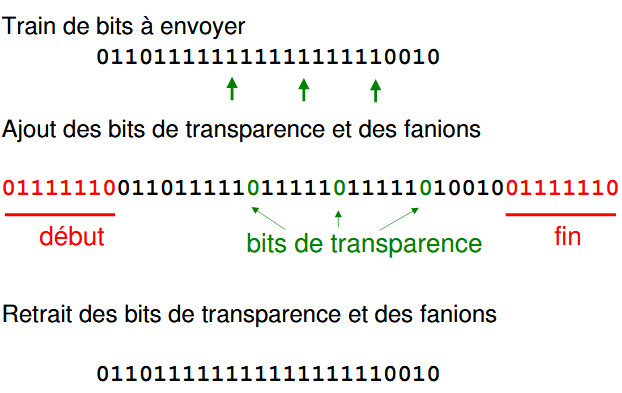

#### Codage

On code ensuite les données à l'aide du codage NRZ. Nous avons choisie de coder le 1 par un 1 et le 0 par un -1.

Nous avions oublié d'ajouter un codage lors du livrable précédent. Il nous sert à ne pas confondre l'absence de signal du bit 0

In [22]:
trame=[1 if i==1 else -1 for i in trame]  #Codage NRZ
print(trame)

[-1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, -1, -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, 1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1]


#### Modulation

Le programme commence par définir toutes les valeurs nécessaires à la modulation et créé une reférence de temps et des signal porteurs. Il va ensuite effectuer la modulation en créant un signal valant la fréquence correspondant au 1 lorsqu'on a un 1 et celle correspondant au -1  lorsqu'on à un -1 pour la modulation FSK. En envoyant un signal lorsqu'on a un 1 et rien lorsqu'on a un -1 pour la modulation ASK.

Nous avons choisi des fréquence de porteuse de 22 000 hertz et de 21 000 hertz car le micro ne peut pas capter au delà de 22 000 hertz. 

Le débit binaire que l'on utilise est de 22 000 bauds. On a choisi ce débit car au dela le son est tronqué et cela risque de créer des erreurs à la réception

On choisie une fréquence d'échantillonnage de 220 000 hertz car il nous faut au moins 10 symboles par bits pour assurer une bonne réception du message

Nbits: 52 Ns: 10 N: 520


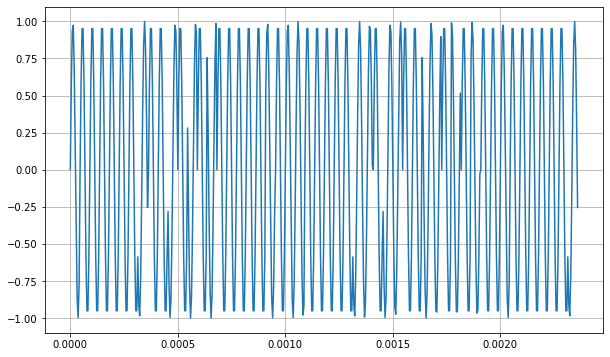

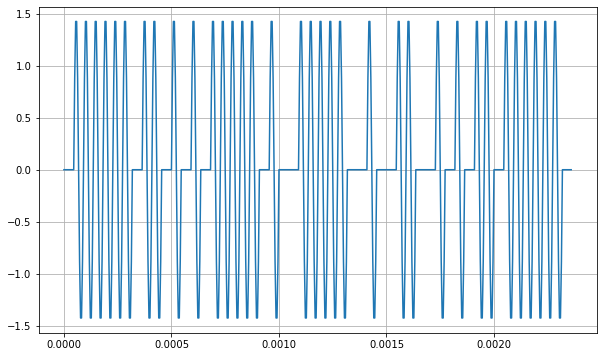

In [23]:
Fe = 220000
M=trame
baud = 22000
Nbits = len(M)
Ns = int(Fe/baud)
N =  int(Ns*Nbits)                            #initialisation des données pour la modulation
print("Nbits:",Nbits,"Ns:",Ns,"N:",N)
M_duplique =np.repeat(M,Ns)


t= np.arange (0.0,N)/Fe
A1 = 1
A2 = 1                  
fp1 = 22000                                  #création des signals porteurs
fp2 = 21000
P1 = A1*np.sin(2*np.pi*fp1*t)                   
P2 = A2*np.sin(2*np.pi*fp2*t)                   



FSK=[P1[i] if M_duplique[i]==1 else P2[i] for i in range(len(M_duplique))] #modulation FSK
ASK=[P1[i]*1.5 if M_duplique[i]==1 else 0 for i in range(len(M_duplique))] #modulation ASK

plt.figure (figsize = (10,6))
plt.plot(t,FSK) 
plt.grid() 
                                       #affichage des signaux
plt.figure (figsize = (10,6))
plt.plot(t,ASK)
plt.grid() 

#### Démodulation FSK

On multiplie le message par chacune des porteuses puis on integre les résultat à l'aide de la méthode des trpèzes. On compar ensuite les résultat pour déterminer si on a reçu un 1 ou un -1

### Réception

In [24]:
S1=FSK*P1
S2=FSK*P2

Res1=[]
Res2=[]
                                                                          #Démodulation FSK
for i in range(0,N,Ns):
    Res1.append(np.trapz(S1[i:i+Ns],t[i:i+Ns]))
    Res2.append(np.trapz(S2[i:i+Ns],t[i:i+Ns]))
    
MessageFSK=[1 if Res1[i]>Res2[i] else -1 for i in range (len(Res1))]

print(MessageFSK)

[-1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, 1, 1, -1, -1, 1, -1, 1, -1, 1, -1, -1, 1, 1, 1, 1, 1, 1, -1]


#### Modulation ASK

On multiplie le signal par la porteuse puis on l'intègre à l'aide de la méthode des trapèzes. Si le résultat et supérieur à 0 on a reçu un 1 sinon un -1

Contrairement à ce qui était dit dans le livrable précedent nous utiliserons la modulation ASK pour envoyer le signal car elle supporte l'envoie de donné avec les fréquences de modulation choisies alors que le FSK créé des erreurs.

In [25]:
S=ASK*P1

Res=[]

for i in range(0,N,Ns):                                                      #démodulation ASK
    Res.append(np.trapz(S[i:i+Ns],t[i:i+Ns]))
    
MessageASK=[1 if Res[i]>0 else -1 for i in range (len(Res))]

print(MessageASK)

[-1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, -1, -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, 1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1]


#### Décodage NRZ

On remplace tous les -1 par des 0 pour retrouver nos niveaux logiques d'origine


In [30]:
MessageDecode=[1 if i==1 else 0 for i in MessageASK]  #décodage NRZ
print(MessageDecode)

[0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0]


#### Récuperation des données

Le programme va commencé par chercher le premier fanion et le suprimer ainsi que tout ce qu'il y a avant lui. Il va ensuite chercher le dernier fanion et le supprimer ainsi que tout ce qu'il y a après lui. Pour finir il va chercher toutes les suites de 5 '1' et remplacer le 0 qui les suient (rajouté lors de l'émission) par un A puis supprimer tous les A. On à choisi cette méthode car nous avons eu des problèmes lié à la taille de la liste si on retirait simplement les 0.

In [31]:
fanion=[0,1,1,1,1,1,1,0]
for i in range(len(MessageDecode)-7):
    #retrait du fanion de commencement et délimitation du début des données
    verif=[]
    for ii in range(8):
        verif.append(MessageDecode[i+ii])
    if verif==fanion:
        debutDonnees=i+8
        break
donnees=MessageDecode[debutDonnees::]

for i in range(len(donnees)-7):
    #retrait du fanion de fin et délimitaion de la fin des données
    verif=[]
    for ii in range(8):
        verif.append(donnees[i+ii])                                           #retrait des fanions
    if verif==fanion:
        finDonnees=i
        break
donnees=donnees[0:finDonnees]


nbr0=0
for i in range(len(donnees)-5):
    verif=[]
    for ii in range(5):
        verif.append(donnees[i+ii])          #retrait des 0 de différenciations
    if verif==[1,1,1,1,1]:
        donnees[i+5]="A"
        nbr0=nbr0+1
for i in range(nbr0):
    donnees.remove("A")
print(donnees) 

[1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1]


#### Décodage de Hamming

On décode les données comme expliqué précédemment

In [32]:
donnees=DecodageHamming(donnees)      #détection et correction d'erreur et retrait des bits de parité
print(donnees)

[0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1]


#### Stucturation des données

On va ensuite remettre les données dans l'ordre et les regrouper par 7 afin des les convertir en texte.

In [33]:
donnees=donnees[::-1]
carac=""
messageRecu=[]
for a, i in enumerate(donnees):          #regroupement des données par 7
    carac=carac+str(i)
    if ((a+1)%7==0):
        messageRecu.append(carac)
        carac=""
print(messageRecu)

['1110100', '1100101', '1110011', '1110100']


#### Convertion en texte

Finalement on transforme en texte toutes nos données afin de récupérer le texte d'origine.

In [34]:
messageReconstitue=""
for i in messageRecu:
    binary_int = int(i, 2)
    byte_number = binary_int.bit_length() + 7 // 8
                                                                #conversion code ASCII => texte
    binary_array = binary_int.to_bytes(byte_number, "big")
    ascii_text = binary_array.decode()
    messageReconstitue = messageReconstitue + ascii_text
print(messageReconstitue)

      t      e      s      t


<h1 style='text-align: center; color: black; background: #5C87DA; padding:10px;  margin-right: 50px;'>6. Conclusion</h1>

Nous avons réussi à mettre en place une chaine de transmission complète qui répond en partie au problème confronté. Cependant certain point sont à améliorer notamment la longueur maximale possible, le son qui est toujours légèrement audible ou encore l’utilisation possible d’un filtre pour n’avoir que le signal envoyé. Le codage de Hamming est à privilégier car comparer au code CRC il permet la correction d’erreur ce que le CRC ne permet pas. Le codage NRZ est à garder car il permet facilement la différenciation entre une tension nulle et le bit 0.
Lors de ce livrable nous avons rencontrés plusieurs difficultés notamment le code de Hamming qui a était compliqué à mettre en place. Pour la trame, nous sommes passés par plusieurs modèle avant d’en avoir une idéale. Enfin, malgré plusieurs tentatives, nous n’avons pas réussi à réaliser la liaison PC à PC. Nous avons rencontrer des problèmes au niveau de la réception du son, plus particulièrement au niveau de la synchronisation lors de la démodulation.

<h1 style='text-align: center; color: black; background: #5C87DA; padding:10px;  margin-right: 50px;'>7. Réferences bibliographques</h1>

http://www.iro.umontreal.ca/~mignotte/IFT1215/ExosSupplementaires/ADuvallet.pdf

http://fsincere.free.fr/isn/python/cours_python.php

https://www.lycee-champollion.fr/IMG/pdf/code_de_hamming.pdf

https://www.enseignement.polytechnique.fr/profs/informatique/Georges.Gonthier/pi97/perrin/codes.html

http://workig.free.fr/ch07.html#id2535662

http://igm.univ-mlv.fr/~duris/RESEAU/L3/L3-phyCodage-20092010.pdf

http://www.lycee-ferry-versailles.fr/si-new/5_1_donnees/cours/cours_trame_v4.pdf
